# Multiples Regressionsmodell


In [1]:
%pip install geopandas

Note: you may need to restart the kernel to use updated packages.


## Cholera outbreak

![John Snow](https://upload.wikimedia.org/wikipedia/commons/c/cc/John_Snow.jpg) [John Snow](https://en.wikipedia.org/wiki/John_Snow) was an English physicist famous for locating the source of the London cholera epidemic of 1854. At the time of the outbreak the germ theory of disease transmission was not developed yet and cholera was blamed on bad air. John Snow investigated the cases and concluded that the source of the outbreak is a water pump located on Broad Street. He was able to convince the city council to close the pump but people initially resisted his theory of water born transmission, because it seemed to be socially unacceptable.

![Cholera cases](http://blog.rtwilson.com/wp-content/uploads/2012/01/SnowMap_Points.png)

![Broad street pump](https://lookup.london/wp-content/uploads/2018/08/Photo-11-08-2018-13-44-18.jpg.webp)

## World War II

During World war 2 combat aviation played a crucial role but also suffered heavy casualties. British bomber command for example reports a death rate of about 46 percent over the entire war. In order to reduce the number of planes that were being shot down during mission, the military collected data on the damage taken from returning bombers in order to decide where to place armour on the planes.

![Flight](https://images.squarespace-cdn.com/content/v1/5497331ae4b0148a6141bd47/1563476799483-JXTY82K6EJ2Y6THNIN53/ke17ZwdGBToddI8pDm48kAY9gT9wm-2Z9KnmFRfe2dVZw-zPPgdn4jUwVcJE1ZvWQUxwkmyExglNqGp0IvTJZUJFbgE-7XRK3dMEBRBhUpzdMdQQVVUpiXVl6rYD3wsGGtpDQQshX7-5HE1V8UScgaHj4j2hNsP6urc280cwWcU/7.jpg)

![Flac damage on a bomber plane](https://www.old.bombercommandmuseum.ca/photos/p_airgunners1b.jpg)

![Bullet holes locations (histogram)](https://alearningadayblog.files.wordpress.com/2018/06/bombers.jpeg)

![](https://riskwerk.files.wordpress.com/2016/11/abraham-wald1.png)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
from urllib.request import urlopen
import json

# Read the data
crime = pd.read_csv("https://raw.githubusercontent.com/febse/data/main/econ/crime.csv", delimiter="\t")

# Drop the 'I' column
crime = crime.drop(columns=['I'])

# Variables description:
# 'C': number of crimes per 100,000 inhabitants
# 'HS': share of high school graduates
# 'U': share of persons living in urban areas

# Code for illustration purposes only
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)


In [3]:
us_counties = gpd.GeoDataFrame.from_features(counties)
us_counties["NAME"] = us_counties["NAME"].str.upper()

In [4]:
crime

,County,C,HS,U
0,ALACHUA,104,82.7,73.2
1,BAKER,20,64.1,21.5
2,BAY,64,74.7,85.0
3,BRADFORD,50,65.0,23.2
4,BREVARD,64,82.3,91.9
...,...,...,...,...
62,UNION,6,67.7,0.0
63,VOLUSIA,62,75.4,83.9
64,WAKULLA,29,71.6,0.0
65,WALTON,18,66.5,20.9


In [5]:
# Define county name compatibility
county_name_compat = {
  "WASHINGTON": "WASHING",
  "SANTA ROSA": "SANTAR",
  "SUWANNEE": "SUWANEE",
  "PALM BEACH": "PALMB",
  "OKEECHOBEE": "OKEECH",
  "INDIAN RIVER": "INDIANR",
  "HILLSBOROUGH": "HILLSBOR.",
  "MIAMI-DADE": "DADE"
}

# Load US counties data
# Replace 'us_counties.geojson' with your actual US counties GeoJSON file

florida_counties = us_counties[us_counties["STATE"] == "12"].copy()
florida_counties["NAME"] = florida_counties["NAME"].replace(county_name_compat)
florida_counties["NAME"] = florida_counties["NAME"].replace("[\s.]", "", regex=True)
crime["County"] = crime["County"].replace("[\s.]", "", regex=True)
# Filter for Florida counties
fc = pd.merge(florida_counties, crime, right_on="County", left_on="NAME", how='right')

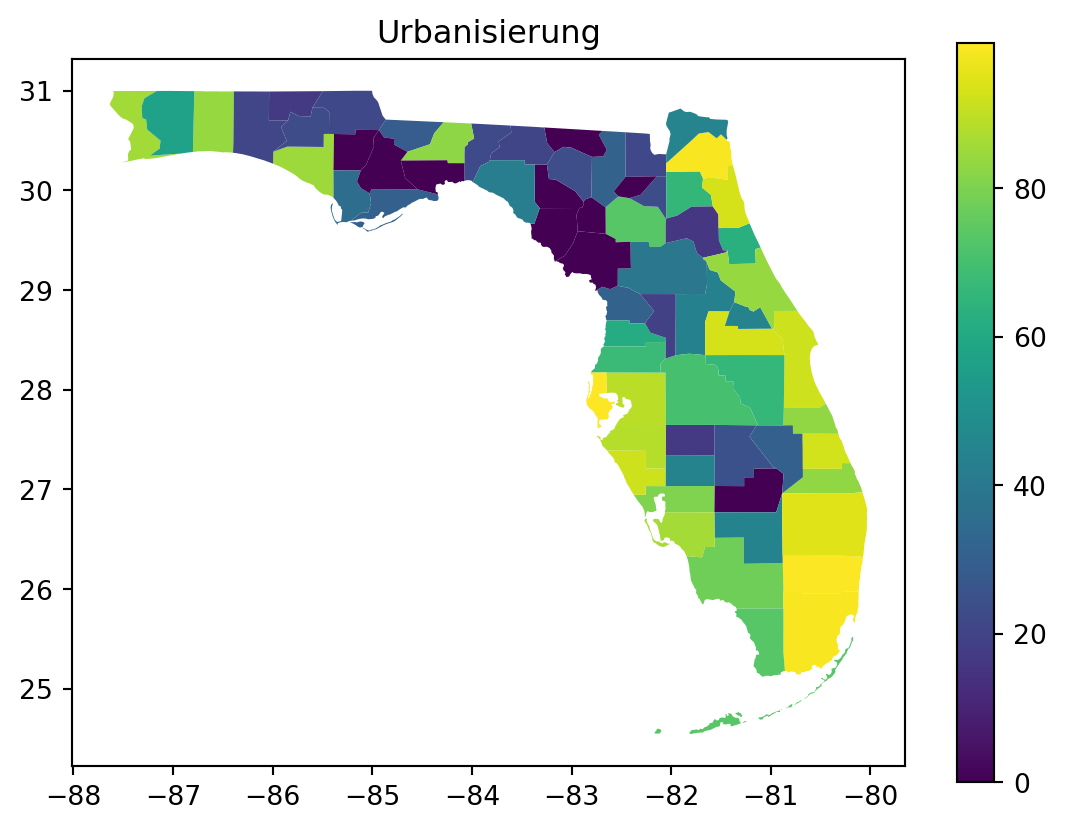

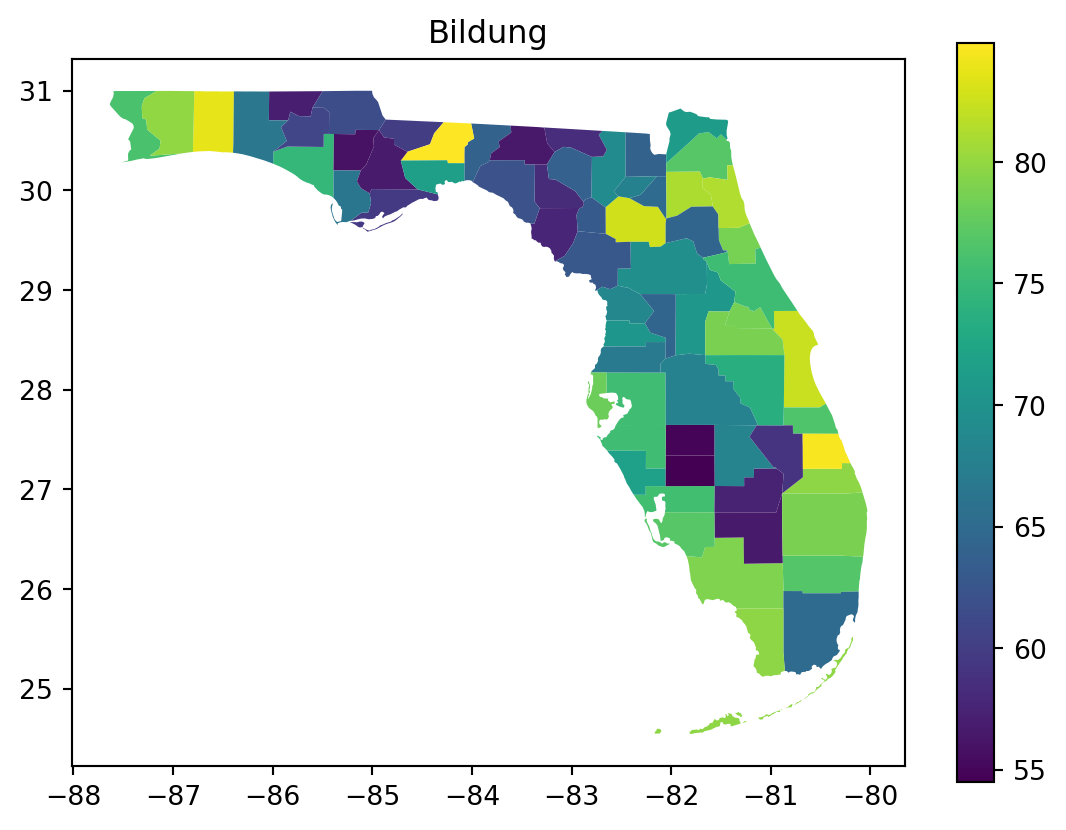

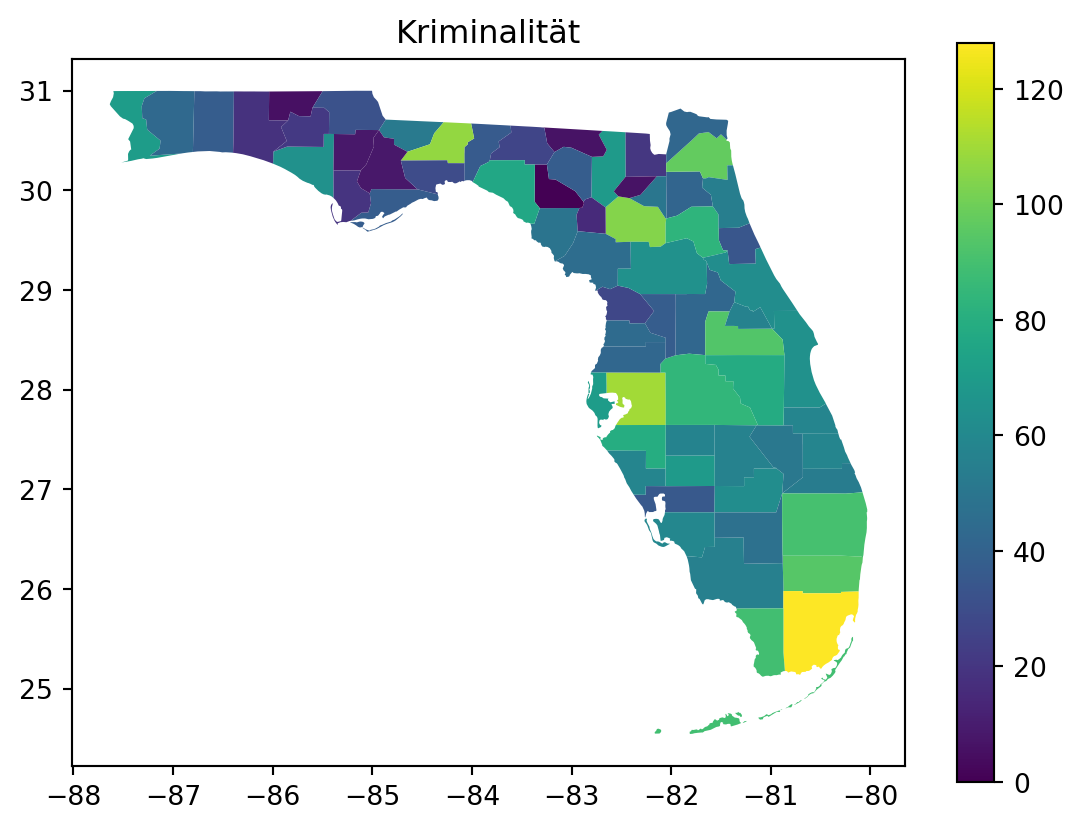

In [6]:
import matplotlib.pyplot as plt

# Plot urbanisation
fc.plot(column='U', legend=True)
plt.title('Urbanisierung')
plt.show()

# Plot high school graduates
fc.plot(column='HS', legend=True)
plt.title("Bildung")
plt.show()

fc.plot(column='C', legend=True)
plt.title("Kriminalität")
plt.show()



# Modell 1: Kriminalität und Bildung

$$
\text{C}_i \sim N(\mu_i, \sigma^2) \\
\mu_i = \beta_0 + \beta_1 \text{HS}_i \\
$$


/home/amarov/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



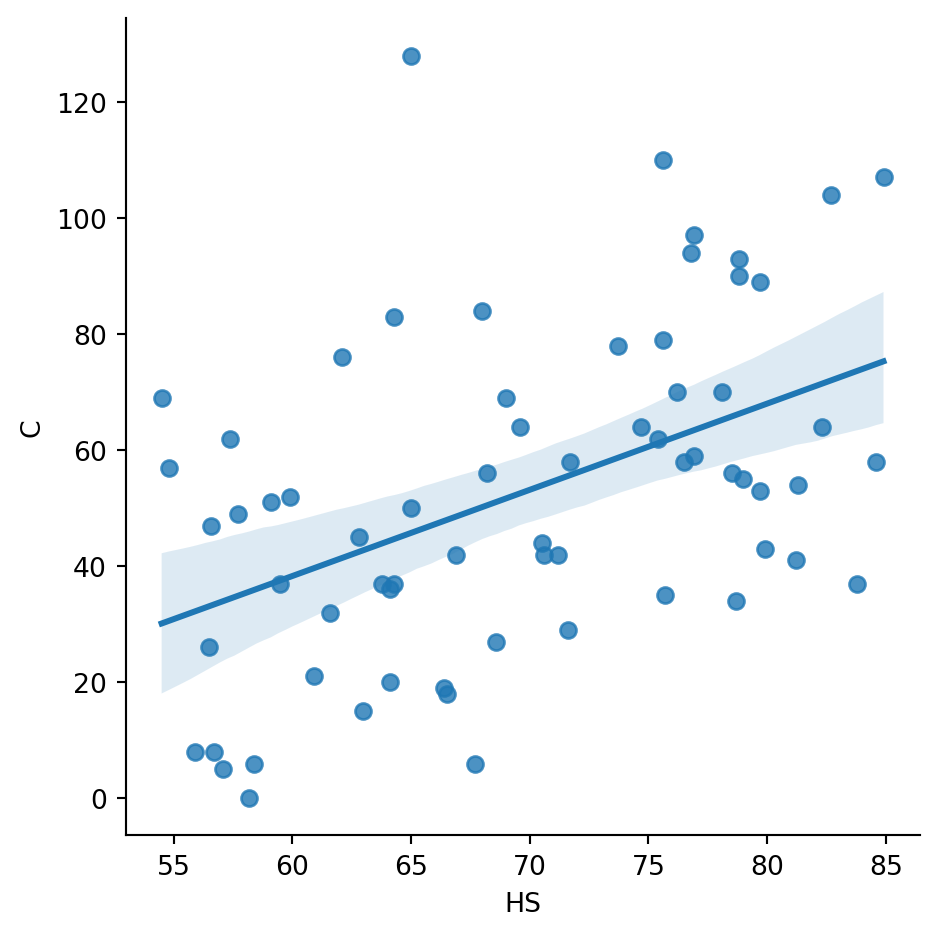

In [7]:
sns.lmplot(x='HS', y='C', data=fc)

In [8]:
from statsmodels.formula.api import ols

# Schätzen Sie das Modell

model1 = ols('C ~ HS', data=fc).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      C   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     18.12
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           6.81e-05
Time:                        15:25:07   Log-Likelihood:                -310.05
No. Observations:                  67   AIC:                             624.1
Df Residuals:                      65   BIC:                             628.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -50.8569     24.451     -2.080      0.041     -99.688      -2.026
HS             1.4860      0.349      4.257      0.000       0.789       2.183
==============================================================================
Omnibus:                        4.854   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.181
Skew:                           0.601   Prob(JB):                        0.124
Kurtosis:                       3.225   Cond. No.                         558.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Modell 2: Kriminalität und Urbanisierung

$$
\text{C}_i \sim N(\mu_i, \sigma^2) \\
\mu_i = \beta_0 + \beta_1 \text{U}_i \\
$$


/home/amarov/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



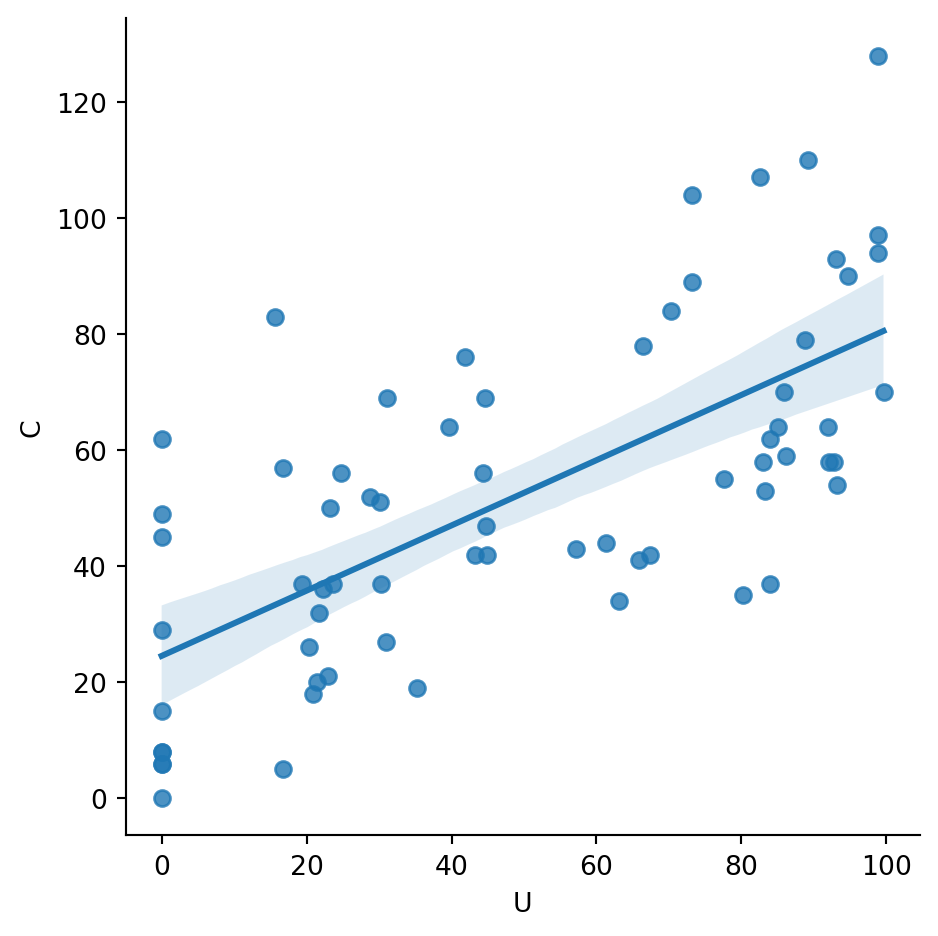

In [9]:
# Stellen Sie die Daten und die Regressionsgerade in einem Streudiagramm dar
sns.lmplot(x='U', y='C', data=fc)

In [10]:
# Schätzen Sie das Modell
modell2 = ols('C ~ U', data=fc).fit()
modell2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      C   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     55.11
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           3.08e-10
Time:                        15:25:07   Log-Likelihood:                -297.71
No. Observations:                  67   AIC:                             599.4
Df Residuals:                      65   BIC:                             603.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.5412      4.539      5.406      0.000      15.476      33.607
U              0.5622      0.076      7.424      0.000       0.411       0.713
==============================================================================
Omnibus:                        4.698   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                4.124
Skew:                           0.520   Prob(JB):                        0.127
Kurtosis:                       2.372   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Modell 3: Bildung und Urbanisierung

$$
\text{HS}_i \sim N(\mu_i, \sigma^2) \\
\mu_i = \beta_0 + \beta_1 \text{U}_i
$$


/home/amarov/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



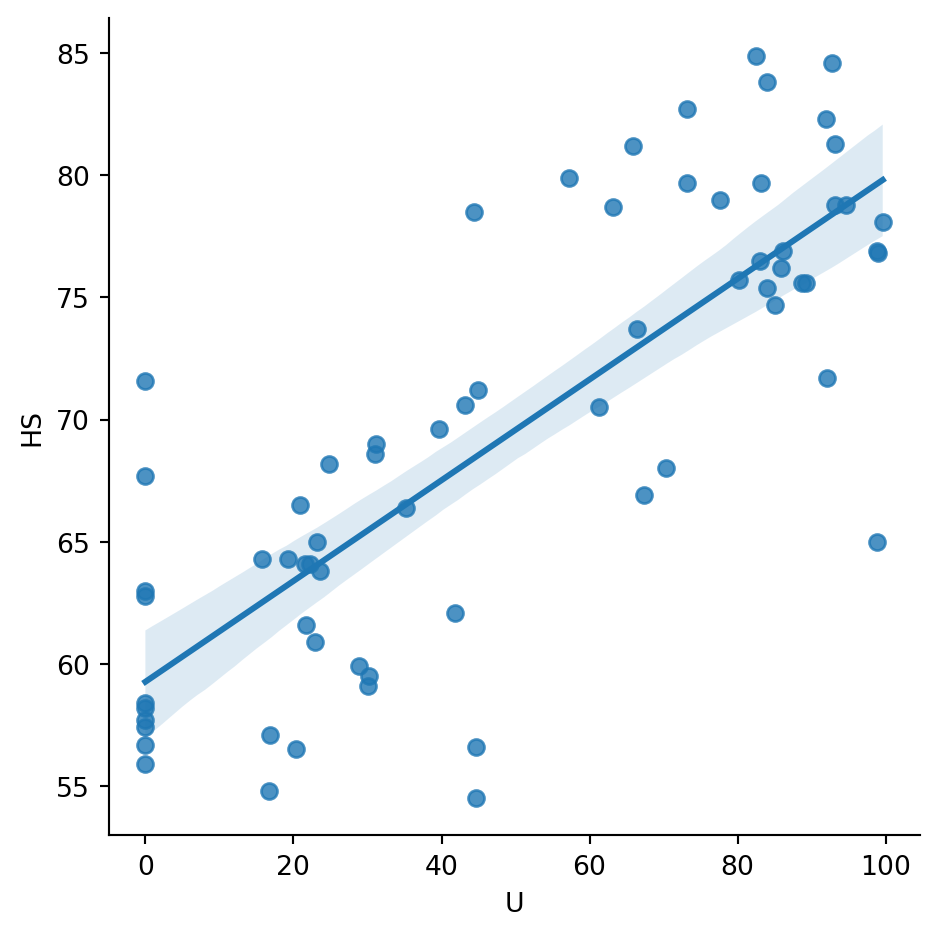

In [11]:
# Stellen Sie die Daten und die Regressionsgerade in einem Streudiagramm dar
sns.lmplot(x='U', y='HS', data=fc)

In [12]:
# Schätzen Sie das Modell
modell3 = ols('HS ~ U', data=fc).fit()
modell3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HS   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     108.4
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           1.73e-15
Time:                        15:25:07   Log-Likelihood:                -207.84
No. Observations:                  67   AIC:                             419.7
Df Residuals:                      65   BIC:                             424.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.2701      1.187     49.936      0.000      56.900      61.641
U              0.2062      0.020     10.414      0.000       0.167       0.246
==============================================================================
Omnibus:                        1.873   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.172
Skew:                          -0.268   Prob(JB):                        0.557
Kurtosis:                       3.364   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Graphische Darstellung der Daten


/home/amarov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/amarov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/amarov/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



/home/amarov/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



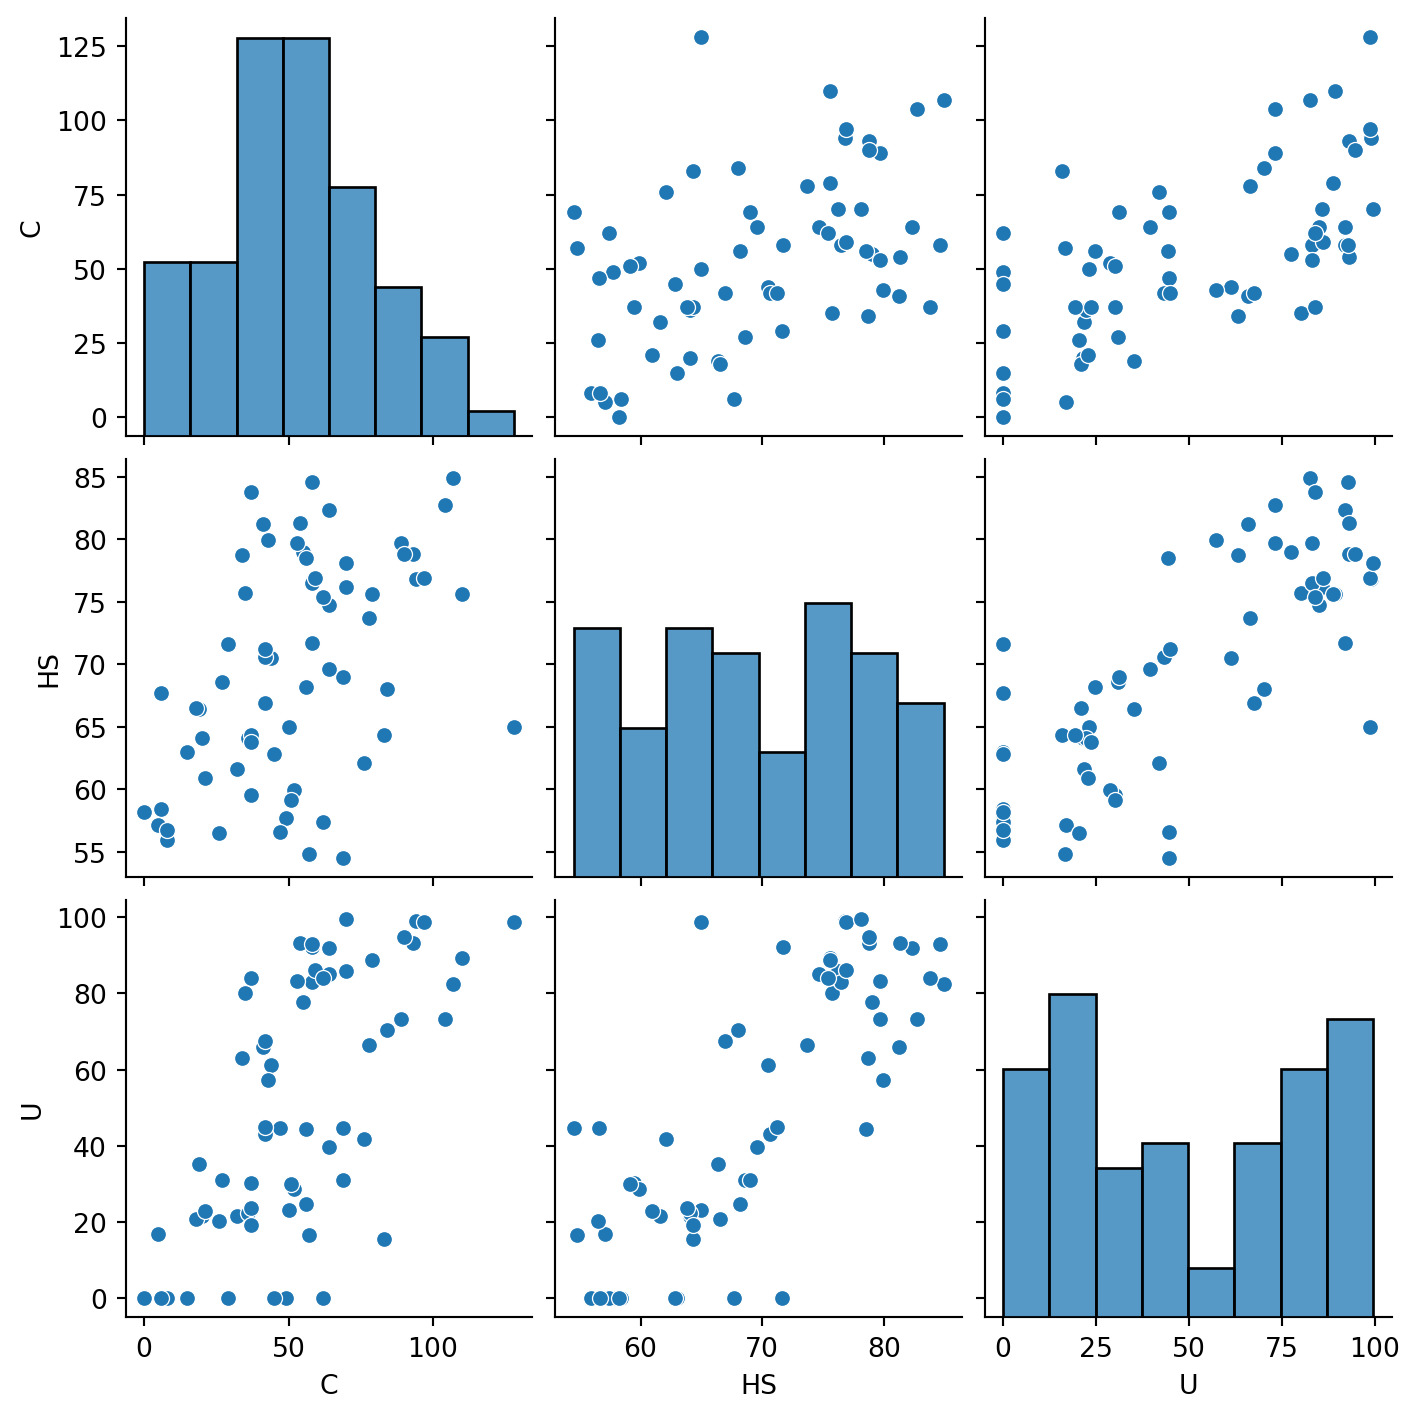

In [13]:

# Assuming 'crime' is the pandas DataFrame containing the data
sns.pairplot(crime)


## Modell 4: Kriminalität, Bildung und Urbanisierung

$$
\text{C}_i \sim N(\mu_i, \sigma^2) \\
\mu_i = \beta_0 + \beta_1 \text{HS}_i + \beta_2 \text{U}_i
$$

In [14]:
# Schätzen Sie das Modell
modell4 = ols('C ~ HS + U', data=fc).fit()
modell4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      C   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     28.54
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           1.38e-09
Time:                        15:25:09   Log-Likelihood:                -296.93
No. Observations:                  67   AIC:                             599.9
Df Residuals:                      64   BIC:                             606.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.1181     28.365      2.084      0.041       2.452     115.784
HS            -0.5834      0.472     -1.235      0.221      -1.527       0.360
U              0.6825      0.123      5.539      0.000       0.436       0.929
==============================================================================
Omnibus:                        4.652   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                4.252
Skew:                           0.543   Prob(JB):                        0.119
Kurtosis:                       2.414   Cond. No.                         997.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Schätzen Sie die erwartete Kriminalitätsrate für eine County mit einer Urbanisierung von 0% und einer High School Abschlussrate 0%.
- Schätzen Sie die erwartete Kriminalitätsrate für eine County mit einem mittleren Urbanisierungsgrad und einer mittleren High School Abschlussrate

In [16]:
import numpy as np

def center(x):
    return x - np.mean(x)

ols("C ~ center(HS) + center(U)", data=fc).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      C   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     28.54
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           1.38e-09
Time:                        15:25:09   Log-Likelihood:                -296.93
No. Observations:                  67   AIC:                             599.9
Df Residuals:                      64   BIC:                             606.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.4030      2.543     20.607      0.000      47.323      57.483
center(HS)    -0.5834      0.472     -1.235      0.221      -1.527       0.360
center(U)      0.6825      0.123      5.539      0.000       0.436       0.929
==============================================================================
Omnibus:                        4.652   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                4.252
Skew:                           0.543   Prob(JB):                        0.119
Kurtosis:                       2.414   Cond. No.                         34.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Normalize the predictors in such a way so that the 
# Intercept is the expected value of the dependent variable at the minimum value of the predictors
# and the slope coefficients estimate the expected difference in the dependent variable for a change between the minimum and maximum value of the predictors

def norm_min_max(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

ols("C ~ norm_min_max(HS) + norm_min_max(U)", data=fc).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      C   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     28.54
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           1.38e-09
Time:                        15:25:09   Log-Likelihood:                -296.93
No. Observations:                  67   AIC:                             599.9
Df Residuals:                      64   BIC:                             606.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           27.3240      5.052      5.409      0.000      17.232      37.416
norm_min_max(HS)   -17.7347     14.363     -1.235      0.221     -46.428      10.958
norm_min_max(U)     67.9771     12.272      5.539      0.000      43.461      92.493
==============================================================================
Omnibus:                        4.652   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                4.252
Skew:                           0.543   Prob(JB):                        0.119
Kurtosis:                       2.414   Cond. No.                         8.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""